In [1]:
# Dependencies and configuration
import os
from src.config import settings

os.makedirs(settings.panels_dir, exist_ok=True)
os.makedirs(settings.crops_dir, exist_ok=True)

In [ ]:
from modules.coreMPE.src.adenzu_panel.image_processing import panel

_ = panel.extract_panels_for_images_in_folder_recursive(
    input_dir=str(settings.pages_dir),
    output_dir=str(settings.panels_dir),
    split_joint_panels=False,   # maps to --split-joint-panels
    fallback=True              # maps to --fallback
)

In [ ]:
# Extract head crops (YOLOv8_animeface)
from src.headExtraction import anime_extraction_recursive

valid_exts = {".jpg", ".jpeg", ".png"}
panel_paths = sorted(
    [p for p in settings.panels_dir.iterdir() if p.suffix.lower() in valid_exts]
)
num_crops = anime_extraction_recursive()

print(f"Extracted {num_crops} faces")

In [2]:
# Calculate embeds of dataset
from src.recognitionModel import build_model, char_nearest_neighbor
IMG_SIZE = 128

embed_model = build_model(IMG_SIZE, settings.crops_dir)

Found 20654 crops under data/crops


Loading crops: 100%|██████████| 20654/20654 [00:16<00:00, 1231.93it/s]


Successfully loaded 20654 crops
323/323 ━━━━━━━━━━━━━━━━━━━━ 81s 246ms/step
Generated embeddings of shape (20654, 1024)
Saved embeddings to data/embeddings.npy
Saved crop paths to data/crop_paths.json


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Found 684 crops above similarity threshold 0.8
Showing top 40 results out of 684 matches


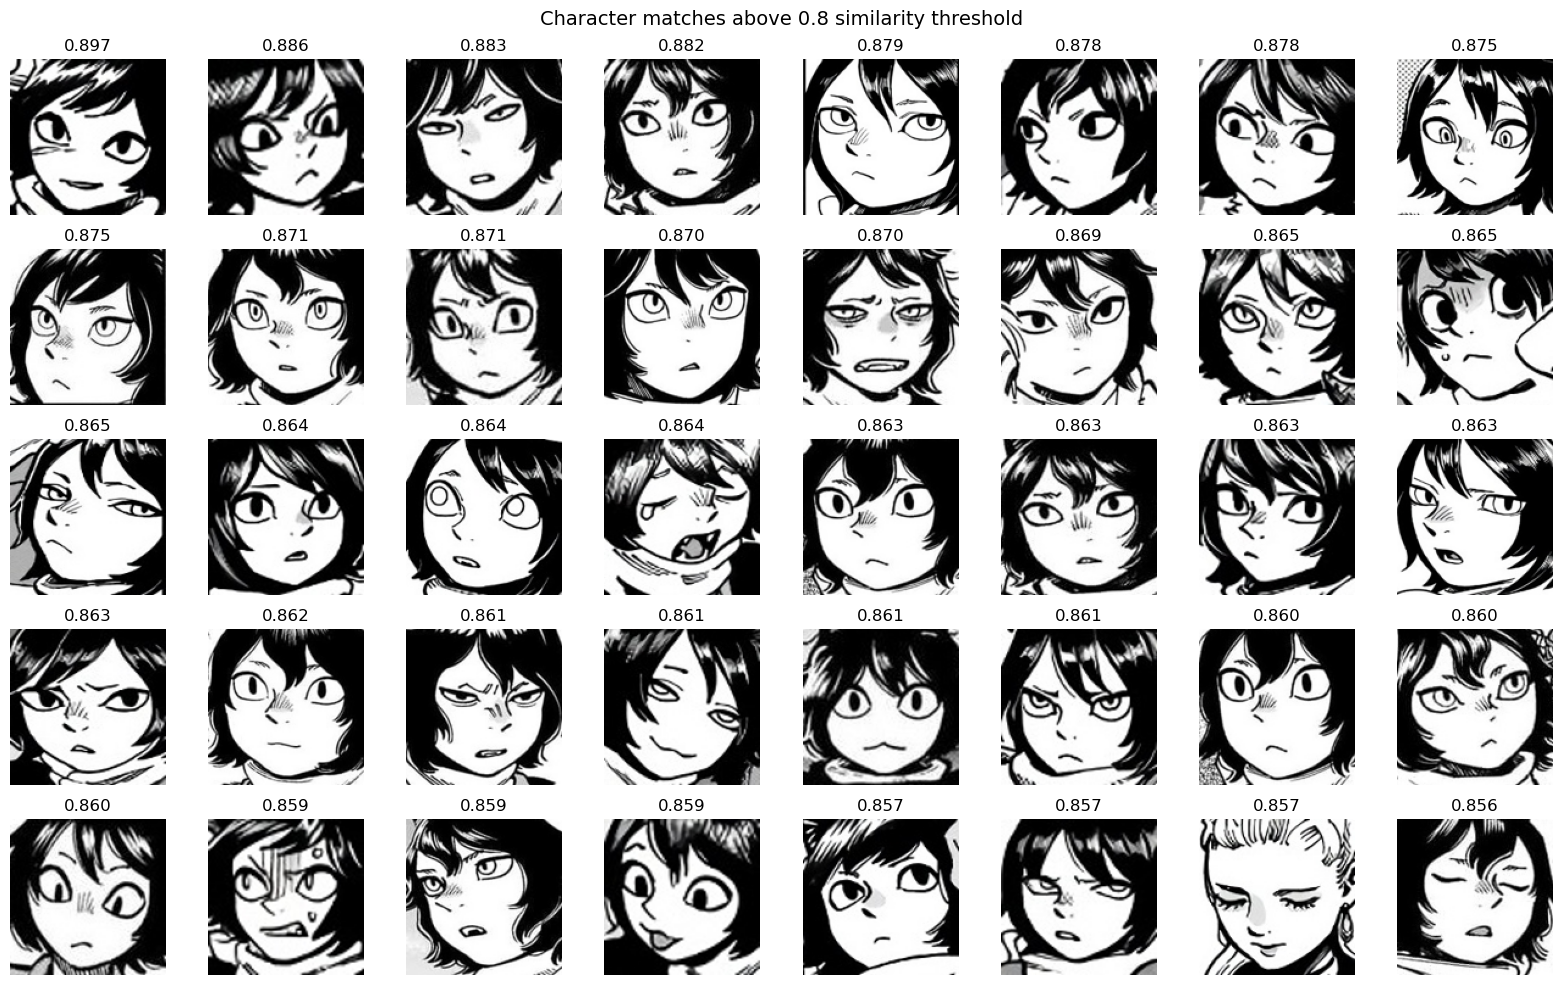

In [3]:
# Set similarity threshold (0-1, higher = more strict)
# 0.7 = fairly similar, 0.8 = very similar, 0.6 = somewhat similar
similarity_threshold = 0.8
seed_paths = [str(p) for p in sorted(settings.izutsumi_dir.glob("*.jpg"))] # Seeds

# Find character matches above threshold
results = char_nearest_neighbor(
    settings.embed_path, 
    settings.crop_path, 
    IMG_SIZE, 
    embed_model, 
    seed_paths,
    similarity_threshold=similarity_threshold
)